In [44]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import sys


# 1 A) Estimate daily continuous yield curve and instantaneous forward rate curve by fitting a cubic spline function to the above discrete CMY.

# 1 B) Graph the end on the months yield curves and instantaneous forward rate curve, and comment on the monthly changes of the two curves

### please check attached pdf to see the detailed explanation on how to calculate the cubic spline
### 4/14/2020 data

In [45]:
x = np.array ([1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
y = np.array ([0.17, 0.19, 0.20, 0.24, 0.25, 0.23, 0.29, 0.42, 0.61, 0.76, 1.19, 1.41])

In [46]:
cs = CubicSpline(x, y)
cs

In [47]:
# take the first derivative of the fitted cubic spline
first_derivative = cs.derivative()
first_derivative

In [48]:
# show coefficients of the cubic spline
coefficients = cs.c
coefficients

array([[ 4.47785305e+00,  4.47785305e+00, -9.92931503e-01,
         2.27473219e-01,  2.29066087e-02, -2.64819716e-02,
         5.69322556e-03, -6.21450320e-03,  2.17093770e-03,
        -9.03049632e-05, -9.03049632e-05],
       [-1.83946326e+00, -7.20000000e-01,  3.99463262e-01,
        -3.45235365e-01, -4.02553587e-03,  6.46942901e-02,
        -1.47516246e-02,  1.94077288e-02, -1.78792904e-02,
         1.65914889e-03, -1.05000000e-03],
       [ 3.62192403e-01,  1.48903798e-01,  1.22192403e-01,
         1.35749378e-01, -3.88810728e-02,  2.17876815e-02,
         7.17303470e-02,  8.10425553e-02,  8.40994319e-02,
         3.54390074e-02,  4.15304963e-02],
       [ 1.70000000e-01,  1.90000000e-01,  2.00000000e-01,
         2.40000000e-01,  2.50000000e-01,  2.30000000e-01,
         2.90000000e-01,  4.20000000e-01,  6.10000000e-01,
         7.60000000e-01,  1.19000000e+00]])

In [49]:
print ("a0i =", coefficients[0], "for i = 1, ..., 11", "\n")

print ("a1i =", coefficients[1], "for i = 1, ..., 11", "\n")

print ("a2i =", coefficients[2], "for i = 1, ..., 11", "\n")

print ("a3i =", coefficients[3], "for i = 1, ..., 11", "\n")

a0i = [ 4.47785305e+00  4.47785305e+00 -9.92931503e-01  2.27473219e-01
  2.29066087e-02 -2.64819716e-02  5.69322556e-03 -6.21450320e-03
  2.17093770e-03 -9.03049632e-05 -9.03049632e-05] for i = 1, ..., 11 

a1i = [-1.83946326e+00 -7.20000000e-01  3.99463262e-01 -3.45235365e-01
 -4.02553587e-03  6.46942901e-02 -1.47516246e-02  1.94077288e-02
 -1.78792904e-02  1.65914889e-03 -1.05000000e-03] for i = 1, ..., 11 

a2i = [ 0.3621924   0.1489038   0.1221924   0.13574938 -0.03888107  0.02178768
  0.07173035  0.08104256  0.08409943  0.03543901  0.0415305 ] for i = 1, ..., 11 

a3i = [0.17 0.19 0.2  0.24 0.25 0.23 0.29 0.42 0.61 0.76 1.19] for i = 1, ..., 11 



## daily continuous yield curve

In [50]:
# set x to be days in 30 years
daily_time = np.arange(0, 10950/365, 1/365)
daily_time = np.array(daily_time)

In [51]:
# calculate daily yields by fitting "daily_time" into the cubic spline
np.set_printoptions(threshold=sys.maxsize)

print ("Daily continuous yields are", "\n", cs(daily_time))

Daily continuous yields are 
 [0.1244519  0.12651761 0.12853946 0.13051799 0.13245376 0.13434731
 0.13619921 0.13801001 0.13978025 0.1415105  0.14320129 0.14485319
 0.14646675 0.14804252 0.14958105 0.1510829  0.15254861 0.15397875
 0.15537386 0.15673449 0.1580612  0.15935454 0.16061506 0.16184332
 0.16303987 0.16420526 0.16534004 0.16644476 0.16751998 0.16856626
 0.16958413 0.17057417 0.17153691 0.17247291 0.17338272 0.1742669
 0.17512599 0.17596056 0.17677115 0.17755832 0.17832261 0.17906458
 0.17978479 0.18048378 0.18116211 0.18182033 0.182459   0.18307866
 0.18367987 0.18426318 0.18482914 0.1853783  0.18591123 0.18642847
 0.18693057 0.18741808 0.18789156 0.18835157 0.18879865 0.18923335
 0.18965623 0.19006784 0.19046874 0.19085947 0.19124059 0.19161265
 0.1919762  0.1923318  0.19268    0.19302135 0.1933564  0.19368571
 0.19400983 0.19432931 0.1946447  0.19495655 0.19526543 0.19557188
 0.19587645 0.19617969 0.19648217 0.19678442 0.19708701 0.19739049
 0.1976954  0.19800231 0.19831176

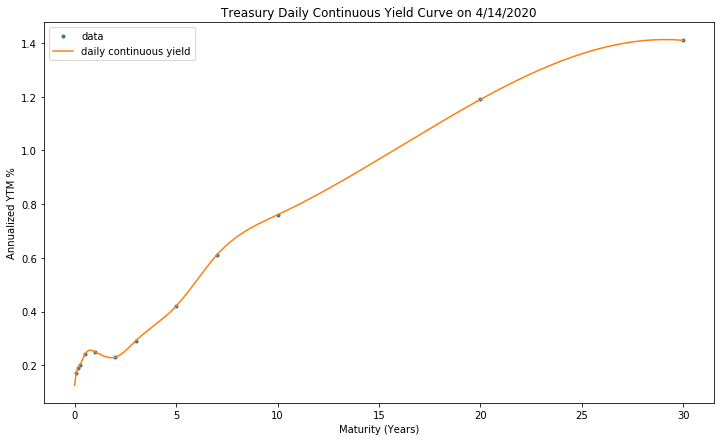

In [52]:
# graph the daily continuous yield curve
plt.figure(figsize = (12,7))
plt.plot(x, y, '.', label='data')
plt.plot(daily_time, cs(daily_time), label="daily continuous yield")
plt.title("Treasury Daily Continuous Yield Curve on 4/14/2020")
plt.xlabel ("Maturity (Years)")
plt.ylabel ("Annualized YTM %")
plt.legend()
plt.show()

## instantaneous forward rate curve


In [53]:
# calculate instantaneous forward rates using the following equation:

ins_forward_rate = cs(daily_time) + daily_time * first_derivative(cs(daily_time))
print ("Instantaneous forward rates are", "\n", ins_forward_rate)

Instantaneous forward rates are 
 [0.1244519  0.12714329 0.12976321 0.13231398 0.13479781 0.13721684
 0.13957313 0.14186866 0.14410532 0.14628493 0.14840926 0.15047999
 0.15249874 0.15446709 0.15638653 0.15825852 0.16008446 0.16186568
 0.16360349 0.16529913 0.16695383 0.16856874 0.17014499 0.17168366
 0.17318583 0.17465249 0.17608465 0.17748325 0.17884923 0.18018349
 0.1814869  0.18276032 0.18400457 0.18522046 0.18640878 0.1875703
 0.18870575 0.18981589 0.19090142 0.19196304 0.19300144 0.1940173
 0.19501128 0.19598402 0.19693617 0.19786836 0.1987812  0.19967531
 0.20055129 0.20140973 0.20225122 0.20307635 0.20388568 0.20467978
 0.20545922 0.20622455 0.20697632 0.20771509 0.20844139 0.20915577
 0.20985876 0.21055089 0.2112327  0.2119047  0.21256742 0.21322138
 0.21386709 0.21450507 0.21513584 0.21575989 0.21637775 0.21698991
 0.21759688 0.21819916 0.21879725 0.21939165 0.21998287 0.22057139
 0.22115772 0.22174234 0.22232577 0.22290848 0.22349099 0.22407377
 0.22465733 0.22524217 0.22582

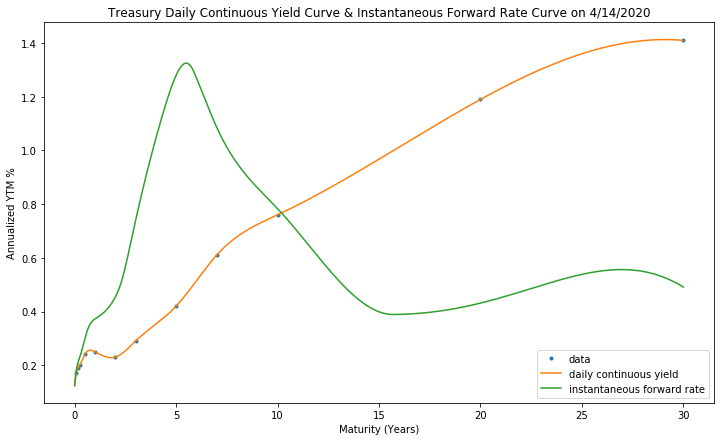

In [54]:
# graph the instantaneous forward rate curve 

plt.figure(figsize = (12,7))
plt.plot(x, y, '.', label='data')
plt.plot(daily_time, cs(daily_time), label="daily continuous yield")
plt.plot(daily_time, ins_forward_rate, label="instantaneous forward rate")
plt.title("Treasury Daily Continuous Yield Curve & Instantaneous Forward Rate Curve on 4/14/2020")
plt.xlabel ("Maturity (Years)")
plt.ylabel ("Annualized YTM %")
plt.legend()
plt.show()

## comment on the monthly changes of the two curves
1. Daily continuous yield curve
    - The daily continuous yield curve has an overall upward trend.
    - YTM ranges between 0.1% and 1.4%. 
    - YTM rises from about 0.1% to about 1.4% from year 0 to 30, with a very short period of decrease between year 1 and 2.

2. Instantaneous forward rate curve
    - The instantaneous forward rate curve has a more volatile trend, compared to daily continuous yield curve.
    - YTM ranges between 0.1% to 1.3%, very similar to that of daily continuous yields.
    - It has an upward trend between year 0 and 6, increasing sharply from about 0.1% to over 1.3%.
    - After year 6, YTM has dropped constantly to about 0.4% until year 15.
    - After year 15, YTM has slowly risen a little bit to about 0.55% until year 27. 
    - After year 27, YTM has dropped back a little bit to about 0.5%.

3. In general, instantaneous forward rates are higher than daily continuous yields approximately before year 10, and lower after year 10.

# 2 A) For each of deliverable bonds using the estimated yield curve in 1) find the time series of daily price of the bonds in 2020

In [55]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [56]:
bonds = pd.read_excel("./TYM_new.xlsx")
bonds.head()

,Cash Security,Price,Conver Factor,TJ,CJ
0,T 2 ¼ 02/15/27,111-29 1/4,0.8006,2027-02-15,2.250
1,T 1 ¾ 12/31/26,108-11 1/4,0.7740,2026-12-31,1.750
2,T 1 ½ 01/31/27,106-24+,0.7607,2027-01-31,1.500
3,T 1 ⅛ 02/28/27,104-09 3/4,0.7408,2027-02-28,1.125
4,T 2 ⅜ 05/15/27,113-07,0.8012,2027-05-15,2.375


In [57]:
bonds['CJ'][0]

2.25

In [58]:
CMY = pd.read_excel("./CMY.xlsx")
CMY.set_index('Date', inplace = True)

CMY.head()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2020-01-06,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
2020-01-07,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
2020-01-08,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35


In [59]:
CMY.loc['2020-01-02']

1 Mo     1.53
2 Mo     1.55
3 Mo     1.54
6 Mo     1.57
1 Yr     1.56
2 Yr     1.58
3 Yr     1.59
5 Yr     1.67
7 Yr     1.79
10 Yr    1.88
20 Yr    2.19
30 Yr    2.33
Name: 2020-01-02 00:00:00, dtype: float64

In [60]:
# create a list of dates from 1/2/2020 to 4/21/2020

dates_2020 = list(CMY.index)
dates_2020[44]

Timestamp('2020-03-06 00:00:00')

In [61]:
dates_2020[44].strftime('%Y-%m-%d')

'2020-03-06'

In [62]:
# Create an empty new dataframe for bond prices

bonds_prices = pd.DataFrame(columns = bonds["Cash Security"], 
                        index = dates_2020 )
bonds_prices.head()

Cash Security,T 2 ¼ 02/15/27,T 1 ¾ 12/31/26,T 1 ½ 01/31/27,T 1 ⅛ 02/28/27,T 2 ⅜ 05/15/27,T 2 ¼ 08/15/27,T 0 ⅝ 03/31/27,T 2 ¼ 11/15/27,T 2 ¾ 02/15/28,T 2 ⅞ 05/15/28,T 2 ⅞ 08/15/28,T 3 ⅛ 11/15/28,T 2 ⅝ 02/15/29,T 2 ⅜ 05/15/29,T 1 ⅝ 08/15/29,T 1 ¾ 11/15/29,T 1 ½ 02/15/30
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## define a function to find PMT dates for each bond
- last PMT always on TJ
- backward induction from TJ to produce previous PMT dates 

- from the given formula, we must make T_i > t 

In [63]:
def find_PMTdates(TJ, t):
    
    result = []
    PMTdate = TJ
    
    while PMTdate > t:
        result.insert(0, PMTdate)
        PMTdate -= relativedelta(months = +6)
        
    return result

In [64]:
# test
find_PMTdates(bonds['TJ'][1], dates_2020[0])

[Timestamp('2020-06-30 00:00:00'),
 Timestamp('2020-12-30 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-12-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-12-30 00:00:00'),
 Timestamp('2023-06-30 00:00:00'),
 Timestamp('2023-12-30 00:00:00'),
 Timestamp('2024-06-30 00:00:00'),
 Timestamp('2024-12-30 00:00:00'),
 Timestamp('2025-06-30 00:00:00'),
 Timestamp('2025-12-30 00:00:00'),
 Timestamp('2026-06-30 00:00:00'),
 Timestamp('2026-12-31 00:00:00')]

## define a function to calculate daily prices for each bond


In [65]:
def cal_daily_price (t, CJ, PMTdates):
    
    # initialize price as zero then add up all PV of PMTs 
    price = 0 
    
    # interpolate daily yield
    x = np.array ([1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
    y = np.array (CMY.loc[t.strftime('%Y-%m-%d')])
    cs = CubicSpline(x, y)
    
    # pv of all coupons 
    for d in PMTdates:
        exponent = (d - t).days/365
        base = 1 + cs ((d - t).days/365) / 100
        price += CJ / (base**exponent)
                  
    # pv of the principle
    price += 100 / (base**exponent)
                  
    return price

In [66]:
dates_2020[0]

Timestamp('2020-01-02 00:00:00')

## calculate

In [67]:
names = list(bonds['Cash Security'])
names[0]

'T 2 ¼ 02/15/27'

In [68]:
days = []
for d in range(len(dates_2020)):
    days.append(str(dates_2020[d].date()))
    
days[0]

'2020-01-02'

In [69]:
for i in range(17): #iterate through each bond
   
    for j in range(76): #iterate through everyday
        t = dates_2020[j]
        CJ = bonds['CJ'][i]
        PMTdates = find_PMTdates(bonds['TJ'][i], t)
        
        price = cal_daily_price (t, CJ, PMTdates)
        bonds_prices.loc [days[j], names[i]]    =  price 

In [70]:
# THIS IS THE ANSWER TO THE QUESTION
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bonds_prices)



Cash Security T 2 ¼ 02/15/27 T 1 ¾ 12/31/26 T 1 ½ 01/31/27 T 1 ⅛ 02/28/27  \
2020-01-02            119.88        111.355        109.374        103.907   
2020-01-03           120.456        111.906        109.921        104.445   
2020-01-06           120.398         111.85        109.867        104.394   
2020-01-07           120.272        111.729        109.745        104.271   
2020-01-08           119.981        111.452        109.472        104.004   
2020-01-09           120.066        111.533         109.55         104.08   
2020-01-10           120.277        111.736        109.753        104.281   
2020-01-13           120.156        111.619        109.637        104.166   
2020-01-14           120.304        111.759        109.778        104.306   
2020-01-15           120.526         111.97        109.988        104.513   
2020-01-16           120.387        111.834        109.856        104.386   
2020-01-17           120.329        111.781          109.8        104.327   

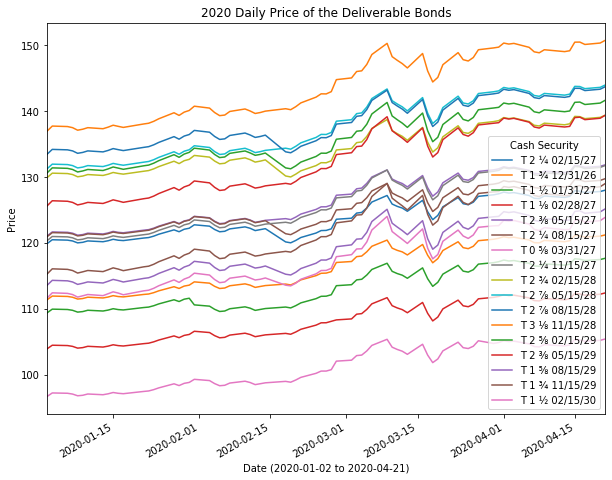

In [71]:
bonds_prices.plot(figsize = (10, 8))
plt.title("2020 Daily Price of the Deliverable Bonds")
plt.xlabel ("Date (2020-01-02 to 2020-04-21)")
plt.ylabel ("Price")
plt.show()

# 2 B) Find the daily rate of return of each bond and conversion factor adjusted return

## daily rate of return

In [72]:
# THIS IS THE ANSWER TO THE QUESTION

bonds_return = bonds_prices.pct_change()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bonds_return)


Cash Security  T 2 ¼ 02/15/27  T 1 ¾ 12/31/26  T 1 ½ 01/31/27  T 1 ⅛ 02/28/27  \
2020-01-02                NaN             NaN             NaN             NaN   
2020-01-03           0.004799        0.004951        0.005002        0.005175   
2020-01-06          -0.000478       -0.000502       -0.000489       -0.000488   
2020-01-07          -0.001043       -0.001087       -0.001115       -0.001177   
2020-01-08          -0.002420       -0.002473       -0.002489       -0.002560   
2020-01-09           0.000709        0.000718        0.000718        0.000731   
2020-01-10           0.001758        0.001827        0.001853        0.001927   
2020-01-13          -0.001009       -0.001053       -0.001060       -0.001096   
2020-01-14           0.001232        0.001259        0.001283        0.001338   
2020-01-15           0.001846        0.001890        0.001916        0.001986   
2020-01-16          -0.001159       -0.001215       -0.001202       -0.001218   
2020-01-17          -0.00047

## conversion factor adjusted return

In [73]:
bonds.head()

,Cash Security,Price,Conver Factor,TJ,CJ
0,T 2 ¼ 02/15/27,111-29 1/4,0.8006,2027-02-15,2.250
1,T 1 ¾ 12/31/26,108-11 1/4,0.7740,2026-12-31,1.750
2,T 1 ½ 01/31/27,106-24+,0.7607,2027-01-31,1.500
3,T 1 ⅛ 02/28/27,104-09 3/4,0.7408,2027-02-28,1.125
4,T 2 ⅜ 05/15/27,113-07,0.8012,2027-05-15,2.375


In [74]:
bonds_return_cf = bonds_return

In [75]:
for i in range(17): #iterate through each bond
    cf = bonds['Conver Factor'][i]
    bonds_return_cf.loc [:, names[i]]    =   bonds_return_cf.loc [:, names[i]] * cf

In [76]:
# THIS IS THE ANSWER TO THE QUESTION

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bonds_return_cf)


Cash Security  T 2 ¼ 02/15/27  T 1 ¾ 12/31/26  T 1 ½ 01/31/27  T 1 ⅛ 02/28/27  \
2020-01-02                NaN             NaN             NaN             NaN   
2020-01-03           0.003842        0.003832        0.003805        0.003833   
2020-01-06          -0.000383       -0.000389       -0.000372       -0.000361   
2020-01-07          -0.000835       -0.000841       -0.000848       -0.000872   
2020-01-08          -0.001938       -0.001914       -0.001893       -0.001896   
2020-01-09           0.000568        0.000556        0.000546        0.000541   
2020-01-10           0.001408        0.001414        0.001410        0.001427   
2020-01-13          -0.000808       -0.000815       -0.000806       -0.000812   
2020-01-14           0.000987        0.000974        0.000976        0.000991   
2020-01-15           0.001478        0.001463        0.001457        0.001471   
2020-01-16          -0.000928       -0.000940       -0.000914       -0.000902   
2020-01-17          -0.00038

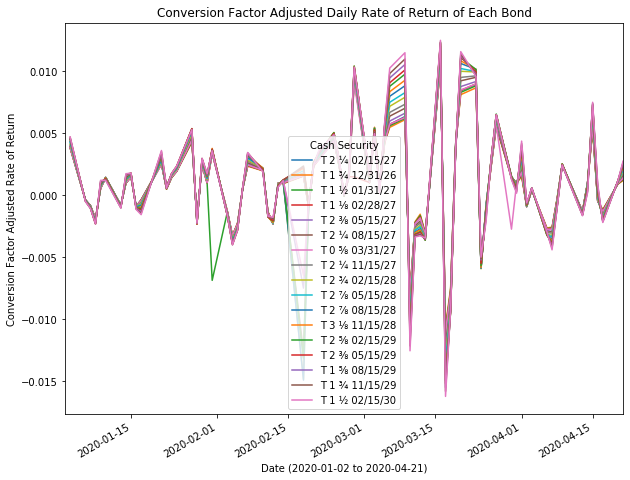

In [77]:
bonds_return_cf.plot(figsize = (10, 8))
plt.title("Conversion Factor Adjusted Daily Rate of Return of Each Bond")
plt.xlabel ("Date (2020-01-02 to 2020-04-21)")
plt.ylabel ("Conversion Factor Adjusted Rate of Return")
plt.show()

# 2 C) Compare and comment on the conversion factor adjusted return of the above bonds.

1. In general, the overall trend of the cf-adjusted return is very similar for all deliverable bonds.
    - CF-adjusted return ranges from about -1.5% to about 1.25%.
2. Since Feburary, cf-adjusted return has become especially volatile with sudden increse and decrease.
    - For example, on 2020-3-16, cf-adjusted return dropped from the highest of the year to the lowest. I think that could be resulted from the announcement made by the Federal Reserve on the previous day that it would cut its target interest rate near zero and the more severe COVID-19 situation in the US.

In [78]:
print ("Done")

Done
